In [3]:
from datetime import datetime, date
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib

In [4]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,8,8,9,3,1]

In [42]:
def create_visualization(x,y):
    '''
        Create Visualization
        return:
            - saves the created plot in ./results/
            - dir: path to working directory
            - path: path to saved plot
    '''

    # Font size
    plt.rc('font', size=22)          # controls default text sizes
    plt.rc('axes', titlesize=22)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
    plt.rc('legend', fontsize=18)    # legend fontsize
    plt.rc('figure', titlesize=22)  # fontsize of the figure title

    #create new plot with matplotlib
    fig, ax = plt.subplots(figsize=(14, 7))

    # add a bar plot to the figure
    ax.bar(x,y, color='grey')
    ax.set(xlabel='testes2.0', ylabel='testes [h]')

    # define filename with current date e.g. "2021-04-08.png"
    filename = str(date.today()) + ".png"

    # working directory
    dir = pathlib.Path(r'C:\\Users\\Jayde\\OneDrive\\Python\\Chart')

    # folder where the plots should be saved
    folder = r"\Chart"

    path_plot = str(dir) + folder + filename #folder + filename

    # save plot
    fig.savefig(path_plot, dpi=fig.dpi)

    return path_plot, dir

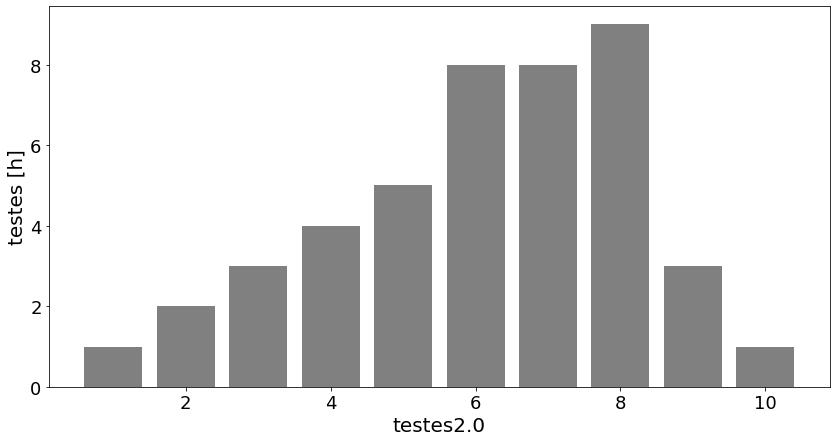

In [43]:
path_plot, dir = create_visualization(x, y)

In [44]:
from datetime import datetime, date
import os
import smtplib
import pathlib

from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.message import EmailMessage
from email.mime.base import MIMEBase

# save the plot with date as filename in ./results/
filename = str(date.today()) + ".png"

# working directory
dir = pathlib.Path(r'C:\\Users\\Jayde\\OneDrive\\Python\\Chart')

# folder where the plots should be saved
#folder = 

# path to image
path_plot = str(dir) + folder + filename

# Settings
#from_mail = os.environ['MAIL1']  # "test.name@googlemail.com"
#from_password = os.environ['G-PW']  # "password123"
#to_mail = os.environ['MAIL2']  # "test@outlook.com"

from_mail = "JippoGhonzho@gmail.com" #The sender email
to_mail = "jayden.earea@gmail.com" #The receiver email
from_password = ("Gh0nzh093") #The password to the sender email

smtp_server = "smtp.gmail.com"
smtp_port = 465

def send_email(path_plot, smtp_server, smtp_port, from_mail, from_password, to_mail):
    '''
        Send results via mail
    '''

    # Create the email message
    msg = MIMEMultipart()
    msg['Subject'] = 'Simple Data Report: Time analysis'
    msg['From'] = from_mail
    COMMASPACE = ', '
    msg['To'] = COMMASPACE.join([from_mail, to_mail])
    msg.preamble = 'Simple Data Report: Time analysis'

    # Open the files in binary mode and attach to mail
    with open(path_plot, 'rb') as fp:
        img = MIMEImage(fp.read())
        img.add_header('Content-Disposition', 'attachment', filename='hours_plot.png')
        img.add_header('X-Attachment-Id', '0')
        img.add_header('Content-ID', '<0>')
        fp.close()
        msg.attach(img)

    # Attach HTML body
    msg.attach(MIMEText(
        '''
        <html>
            <body>
                <h1 style="text-align: center;">Simple Data Report</h1>
                <p>Here could be a short description of the data.</p>
                <p><img src="cid:0"></p>
            </body>
        </html>'
        ''',
        'html', 'utf-8'))

    # Send mail
    server = smtplib.SMTP_SSL(smtp_server, smtp_port)
    server.ehlo()
    server.login(from_mail, from_password)

    server.sendmail(from_mail, [from_mail, to_mail], msg.as_string())
    server.quit()


send_email(path_plot, smtp_server, smtp_port, from_mail, from_password, to_mail)